# Optimalizace bloku plynové elektrárny

Naším úkolem je optimalizovat výkon bloku plynové elektrárny na následujích 24 hodin tak, abychom elektřinu prodali za co nejvyšší cenu:

- každá hodina bude mít jednu konstantní výkonovou úroveň
- minimální výkon je 40 MW a maximální výkon bloku je 180MW
- průměrný výkon musí být 80 MW
- z důvodů omezení sítě musí být průměrný výkon za prvních deset hodin 50MW
- z důvodů technologie plynového bloku nesmí být výkonová změna za jednu hodinu vyšší než 20 MW

Cenová křivka je známa a zadána v proměné **price**.


In [35]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

In [36]:
price = np.array([200, 160, 205, 210, 150, 180, 550, 600,
                  400, 330, 160, 150, 160, 150, 350, 200, 
                  380, 500, 550, 210, 230, 200, 190, 180.,]) # price for every hour in CZK

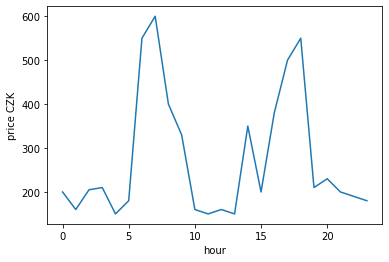

In [37]:
plt.plot(price)
plt.xlabel("hour")
plt.ylabel("price CZK")
plt.show()

In [40]:
power = cp.Variable(24) 
constraints = [
    cp.sum(power) == 24 * 80.0, # average power
    cp.sum(power[:10]) == 10 * 50, # average power first 10 hours
    power >= 40., # minimal MW for block
    power <=180., # maximal MW for block
    power[1:] - power[:-1] <= 20.0, # change less then 20 MW one way
    power[:-1] - power[1:] <= 20.0, # change less then 20 MW other way
]
objective = cp.Maximize(power * price)
problem = cp.Problem(objective, constraints)
problem.solve(verbose=True)


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -5.197e+05  -9.268e+05  +5e+05  3e-02  6e-09  1e+00  5e+03    ---    ---    1  1  - |  -  - 
 1  -5.846e+05  -7.756e+05  +2e+05  1e-02  5e-09  1e+03  2e+03  0.7404  3e-01   0  0  0 |  0  0
 2  -5.919e+05  -6.483e+05  +7e+04  4e-03  2e-09  3e+02  7e+02  0.7108  2e-02   1  1  1 |  0  0
 3  -5.933e+05  -6.080e+05  +2e+04  1e-03  8e-10  9e+01  2e+02  0.7531  2e-02   1  0  0 |  0  0
 4  -5.937e+05  -5.970e+05  +4e+03  2e-04  4e-10  2e+01  4e+01  0.7820  1e-02   1  1  1 |  0  0
 5  -5.938e+05  -5.938e+05  +6e+01  4e-06  2e-11  4e-01  7e-01  0.9890  4e-03   1  0  0 |  0  0
 6  -5.938e+05  -5.938e+05  +7e-01  4e-08  6e-13  4e-03  7e-03  0.9890  1e-04   1  0  0 |  0  0
 7  -5.938e+05  -5.938e+05  +8e-03  4e-10  1e-14  5e-05  8e-05  0.9890  1e-04   1  0  0 |  0  0
 8  -5.938e+05  -5.938e+05  +8e-05  5e-12  2e-

593793.8461484843

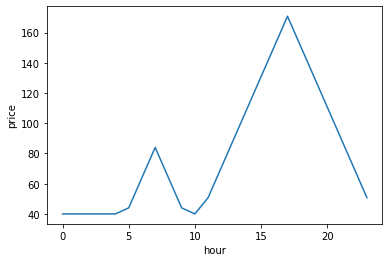

In [43]:
plt.plot(power.value)
plt.xlabel("hour")
plt.ylabel("price")
plt.show()